In [5]:
import pandas as pd
dataset=pd.read_csv("insurance_pre.csv")
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [6]:
dataset=pd.get_dummies(dataset,dtype=int,drop_first=True)
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [7]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [8]:
independent=dataset[['age', 'bmi', 'children','sex_male', 'smoker_yes']]
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0
...,...,...,...,...,...
1333,50,30.970,3,1,0
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


In [9]:
dependent=dataset[['charges']]
dependent

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)
X_train

,age,bmi,children,sex_male,smoker_yes
1163,18,28.215,0,0,0
196,39,32.800,0,0,0
438,52,46.750,5,0,0
183,44,26.410,0,0,0
1298,33,27.455,2,1,0
...,...,...,...,...,...
763,27,26.030,0,1,0
835,42,35.970,2,1,0
1216,40,25.080,0,1,0
559,19,35.530,0,1,0


In [12]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='poisson', splitter='best')
regressor.fit(X_train,Y_train)
regressor

DecisionTreeRegressor(criterion='poisson')

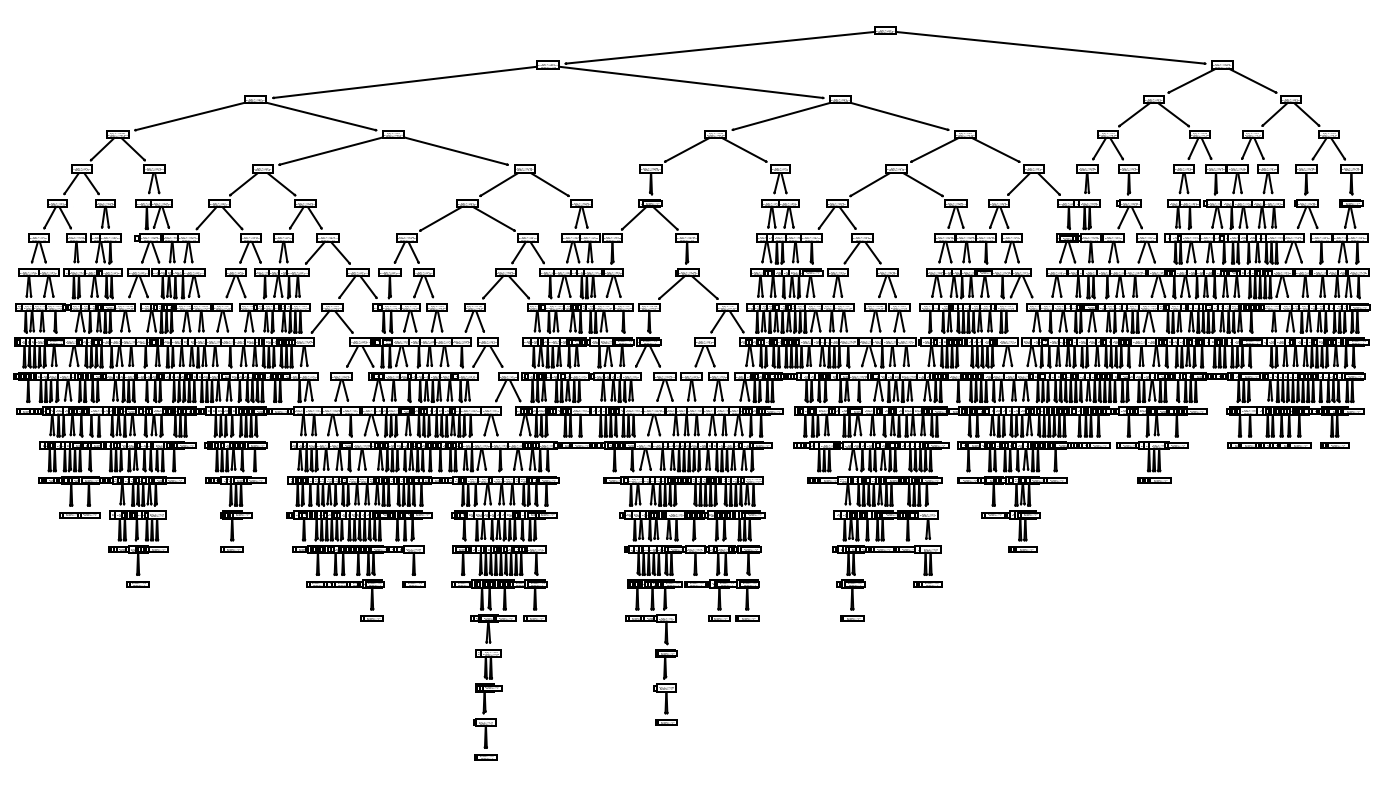

In [13]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()


In [14]:
Y_pred=regressor.predict(X_test)
Y_pred

array([ 9144.565   ,  8930.93455 , 44202.6536  , 13143.86485 ,
        9264.797   , 21984.47061 ,  1615.7667  , 10381.4787  ,
        8252.2843  ,  5253.524   ,  7228.21565 , 30284.64294 ,
        7345.7266  ,  4992.3764  , 18246.4955  , 11015.1747  ,
       12124.9924  ,  3292.52985 ,  6455.86265 , 33907.548   ,
       24667.419   , 11987.1682  ,  9625.92    , 27218.43725 ,
        1261.442   ,  4076.497   ,  3161.454   ,  8538.28845 ,
        3353.284   ,  8116.26885 ,  8252.2843  , 48673.5588  ,
       13981.85035 , 10594.2257  , 16115.3045  ,  3554.203   ,
        8978.1851  , 44585.45587 , 40941.2854  ,  1880.07    ,
       21984.47061 ,  2866.091   , 21659.9301  , 43578.9394  ,
       35585.576   ,  2719.27975 , 11015.1747  ,  6272.4772  ,
        4719.52405 , 11830.6072  ,  2473.3341  ,  2639.0429  ,
       27218.43725 , 60021.39897 , 11856.4115  ,  2689.4954  ,
        2689.4954  ,  8601.3293  ,  7518.02535 , 12913.9924  ,
        1252.407   , 46130.5265  , 12928.7911  , 25333.

In [15]:
from sklearn.metrics import r2_score
r_score=r2_score(Y_test,Y_pred)
r_score

0.7182311892359929

In [17]:
import pickle
filename="finalized_model_DT.sav"
pickle.dump(regressor,open(filename,'wb'))
loaded_model=pickle.load(open("finalized_model_DT.sav",'rb'))
result=loaded_model.predict([[50,27,3,1,0]])
result


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([30284.64294])